In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

df_customers = pd.read_csv('demo/one_day_simulation.csv',parse_dates=True)
df_customers.head()

,time,location,customer_id
0,2020-11-30 07:02:00,entrance,1
1,2020-11-30 07:03:00,drinks,1
2,2020-11-30 07:04:00,drinks,1
3,2020-11-30 07:05:00,drinks,1
4,2020-11-30 07:06:00,spices,1


In [2]:
df_customers['time']= pd.to_datetime(df_customers['time'])
df_customers['arrival_time']=df_customers.groupby('customer_id')['time'].transform(min)
df_customers['leaving_time']=df_customers.groupby('customer_id')['time'].transform(max)
#Hour label to plot
df_customers['hour']=df_customers['time'].dt.hour
#Total time spent in the supermarker
df_customers['total_time'] = df_customers['leaving_time'] - df_customers['arrival_time']
df_customers['total_time'] = pd.to_datetime(df_customers['total_time']).dt.hour * 60 + pd.to_datetime(df_customers['total_time']).dt.minute
#Add a price column to map location with price of products 
df_customers['price']=df_customers['location']
df_customers.price = df_customers.price.map( {'entrance':0 ,'checkout':0,'fruit':4,'spices':3,'dairy':5,'drinks':6} )
df_customers.sort_values(by=['time'],inplace=True)
df_customers.head()

,time,location,customer_id,arrival_time,leaving_time,hour,total_time,price
0,2020-11-30 07:02:00,entrance,1,2020-11-30 07:02:00,2020-11-30 07:09:00,7,7,0
8,2020-11-30 07:02:00,entrance,2,2020-11-30 07:02:00,2020-11-30 07:07:00,7,5,0
14,2020-11-30 07:02:00,entrance,3,2020-11-30 07:02:00,2020-11-30 07:10:00,7,8,0
1,2020-11-30 07:03:00,drinks,1,2020-11-30 07:02:00,2020-11-30 07:09:00,7,7,6
49,2020-11-30 07:03:00,entrance,6,2020-11-30 07:03:00,2020-11-30 07:12:00,7,9,0


# How many new entrance per hour?

Text(3.674999999999997, 0.5, 'Number of new entrance')

<Figure size 576x360 with 0 Axes>

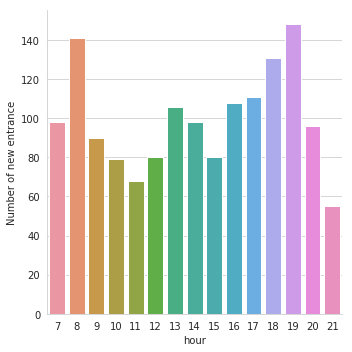

In [3]:
#Nb of customer at entrance per hour
plt.figure(figsize=(8,5))
df_plot_entrance = df_customers.loc[(df_customers['location'] == 'entrance') ,:].copy()
df_plot_entrance = df_plot_entrance.groupby('hour')['location'].count()
d = {'hour':df_plot_entrance.index, 'count':df_plot_entrance.values}
df_plot_entrance = pd.DataFrame(d)
#sns.pointplot(x='hour',y='count',data=df_plot_entrance)
sns.catplot(x='hour',y='count',data=df_plot_entrance,kind='bar')
plt.ylabel('Number of new entrance')

# What is the repartition of customers for each section?

Text(0, 0.5, 'Number of customers')

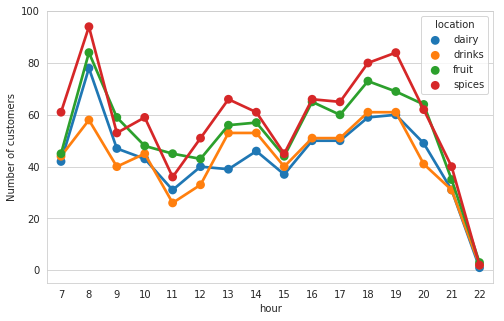

In [4]:
#Nb of customer in each area over time (excluding entrance and checkout)
plt.figure(figsize=(8,5))
df_plot_hour = df_customers.loc[(df_customers['location'] != 'entrance') & (df_customers['location'] != 'checkout'),:].copy()
df_plot_hour = df_plot_hour.groupby(['hour','location']).agg({"customer_id": pd.Series.nunique})
df_plot_hour.reset_index(inplace=True)
sns.pointplot(x='hour',y='customer_id',hue='location',data=df_plot_hour)
plt.ylabel('Number of customers')

# How long a customer is staying in the supermarket?

(6, 9)

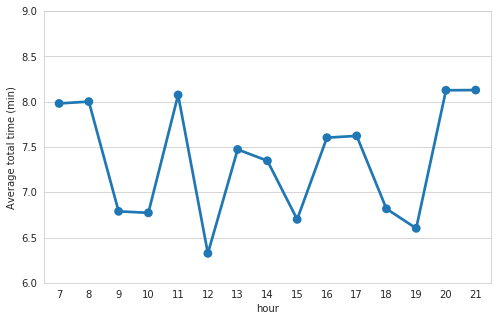

In [6]:
#Time at first state over time
plt.figure(figsize=(8,5))
df_plot_time = df_customers.loc[df_customers['location'] == 'entrance',:].copy()
df_plot_time = df_plot_time.groupby('hour').agg({"total_time": 'mean'})
df_plot_time.reset_index(inplace=True)
sns.pointplot(x='hour',y='total_time',data=df_plot_time)
plt.ylabel('Average total time (min)')
plt.ylim([6,9])

Text(0, 0.5, 'Total time distribution (min)')

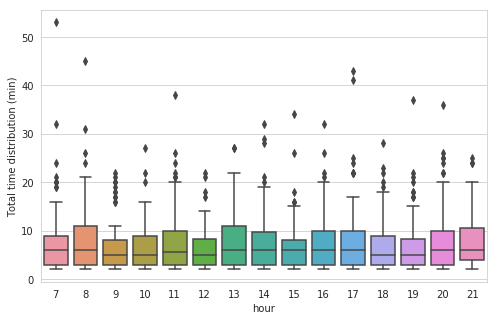

In [6]:
# See the time distribution per hour
plt.figure(figsize=(8,5))
df_plot_time = df_customers.loc[df_customers['location'] == 'entrance',:].copy()
sns.boxplot(data=df_plot_time,y="total_time",x="hour",orient="v")
plt.ylabel('Total time distribution (min)')

# What is the total revenue per hour?

- The estimation will be based on a revenue per minute per section of (4€ for fruit, 3€ for spices, 5€ for dairy and 6€ for drinks )

Text(-2.450000000000003, 0.5, 'Revenue per hour')

<Figure size 576x360 with 0 Axes>

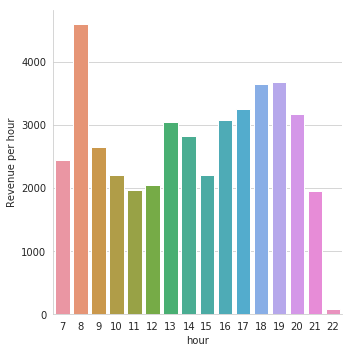

In [7]:
#Revenue per hour
plt.figure(figsize=(8,5))
df_revenue_hour = df_customers.groupby('hour').agg({"price": 'sum'})
df_revenue_hour.reset_index(inplace=True)
sns.catplot(x='hour',y='price',data=df_revenue_hour,kind='bar')
plt.ylabel('Revenue per hour')

# What is the most profitable section?

Text(0.5, 6.79999999999999, 'Section')

<Figure size 576x360 with 0 Axes>

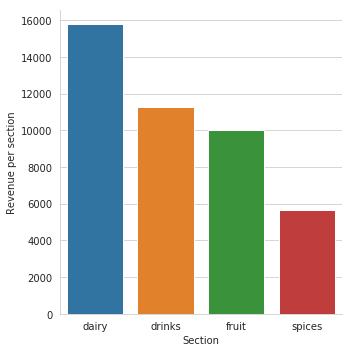

In [8]:
#Revenue per section
plt.figure(figsize=(8,5))
df_revenue_section = df_customers.loc[(df_customers['location'] != 'entrance') & (df_customers['location'] != 'checkout'),:].copy()
df_revenue_section = df_revenue_section.groupby('location').agg({"price": 'sum'})
df_revenue_section.reset_index(inplace=True)
sns.catplot(x='location',y='price',data=df_revenue_section,kind='bar')
plt.ylabel('Revenue per section')
plt.xlabel('Section')